In [2]:
!pip install seaborn

In [3]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import seaborn as sns

from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 28})

In [4]:
kyoto_1_clickstream = pd.read_csv('dataset/data1_clickstream.csv', delimiter=',')
kyoto_1_clickstream['date'], kyoto_1_clickstream['time'] = kyoto_1_clickstream['eventtime'].str.split(' ', 1).str
kyoto_1_clickstream = kyoto_1_clickstream[['userid', 'date']]
kyoto_1_clickstream

,userid,date
0,ds125,2017-11-22
1,ds112,2017-11-22
2,ds104,2017-11-22
3,ds123,2017-11-22
4,ds126,2017-11-22
5,ds142,2017-11-22
6,ds112,2017-11-22
7,ds112,2017-11-22
8,ds142,2017-11-22
9,ds112,2017-11-22


In [5]:
#kyoto_1_score[kyoto_1_score['userid'] == 'ds125'].groupby['date'].size()
plot_df = kyoto_1_clickstream.groupby(['userid', 'date']).size().reset_index(name='counts')
plot_df

kyoto_engage = kyoto_1_clickstream.groupby(['date', 'userid']).size().reset_index(name='counts')
kyoto_engage
#for user in set(kyoto_1_score.userid):
#    kyoto_1_score

,date,userid,counts
0,2017-11-22,ds102,8
1,2017-11-22,ds103,454
2,2017-11-22,ds104,89
3,2017-11-22,ds106,267
4,2017-11-22,ds109,362
5,2017-11-22,ds112,377
6,2017-11-22,ds115,15
7,2017-11-22,ds118,207
8,2017-11-22,ds121,526
9,2017-11-22,ds122,116


[Text(0.5,0,'2017-12-13'),
 Text(1.5,0,'2017-12-26'),
 Text(2.5,0,'2018-01-21'),
 Text(3.5,0,'2018-01-23'),
 Text(4.5,0,'2018-01-24'),
 Text(5.5,0,'2017-11-22'),
 Text(6.5,0,'2017-11-22'),
 Text(7.5,0,'2017-11-22'),
 Text(8.5,0,'2017-12-13'),
 Text(9.5,0,'2018-01-24'),
 Text(10.5,0,'2017-11-22'),
 Text(11.5,0,'2017-12-13'),
 Text(12.5,0,'2018-01-24'),
 Text(13.5,0,'2017-12-13'),
 Text(14.5,0,'2018-01-23'),
 Text(15.5,0,'2018-01-24')]

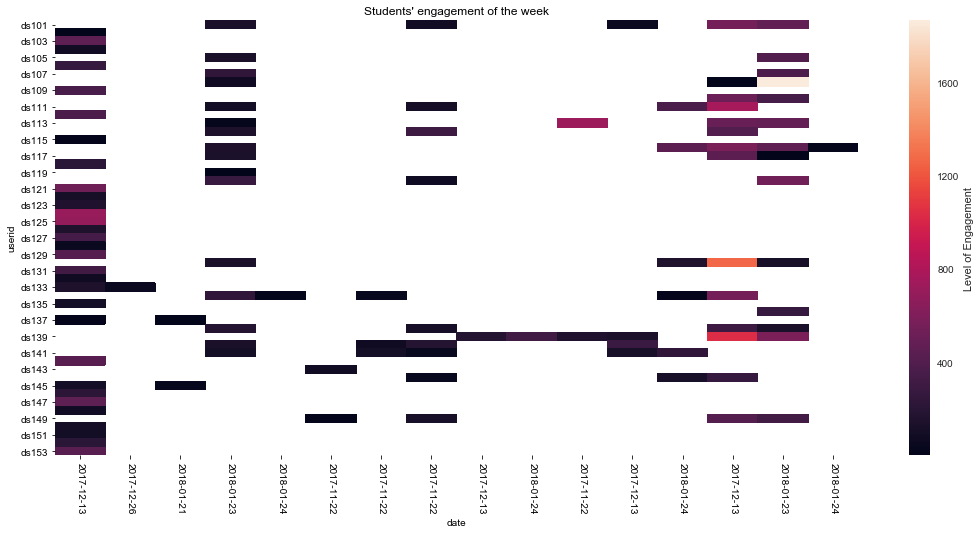

In [6]:

fig1, ax1 = plt.subplots(figsize=(18, 8))
ax1.set_title('Students\' engagement of the week')
pivot = plot_df.pivot(index='userid', columns='date', values='counts')

sns.set()
ax1 = sns.heatmap(pivot, cbar_kws={'label': 'Level of Engagement'})

plot_df['date'] = pd.to_datetime(plot_df['date'])
ax1.set_xticklabels(plot_df['date'].dt.strftime('%Y-%m-%d'), rotation=-90)


In [7]:
kyoto_1_score = pd.read_csv('dataset/data1_score.csv')
kyoto_x_all = pd.merge(plot_df, kyoto_1_score, on='userid')

[Text(0.5,0,'2017-12-13'),
 Text(1.5,0,'2017-12-26'),
 Text(2.5,0,'2018-01-21'),
 Text(3.5,0,'2018-01-23'),
 Text(4.5,0,'2018-01-24'),
 Text(5.5,0,'2017-11-22'),
 Text(6.5,0,'2017-11-22'),
 Text(7.5,0,'2017-11-22'),
 Text(8.5,0,'2017-12-13'),
 Text(9.5,0,'2018-01-24'),
 Text(10.5,0,'2017-11-22'),
 Text(11.5,0,'2017-12-13'),
 Text(12.5,0,'2018-01-24'),
 Text(13.5,0,'2017-12-13'),
 Text(14.5,0,'2018-01-23'),
 Text(15.5,0,'2018-01-24')]

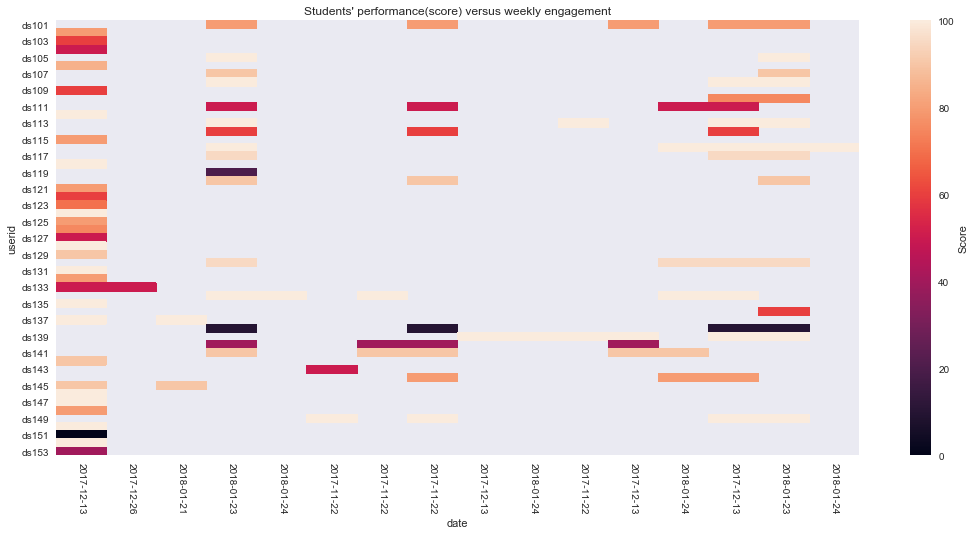

In [8]:
fig1, ax1 = plt.subplots(figsize=(18, 8))
ax1.set_title('Students\' performance(score) versus weekly engagement')
pivot = kyoto_x_all.pivot(index='userid', columns='date', values='score')

sns.set()
ax1 = sns.heatmap(pivot, cbar_kws={'label': 'Score'})

plot_df['date'] = pd.to_datetime(kyoto_x_all['date'])
ax1.set_xticklabels(kyoto_x_all['date'].dt.strftime('%Y-%m-%d'), rotation=-90)

In [9]:
sns.set(style='white')

def corrfunc(x, y, **kws):
    r, p = stats.pearsonr(x, y)
    p_stars = ''
    if p <= 0.05:
        p_stars = '*'
    if p <= 0.01:
        p_stars = '**'
    if p <= 0.001:
        p_stars = '***'
    ax = plt.gca()
    ax.annotate('r = {:.2f} '.format(r) + p_stars,
              xy=(0.05, 0.9), xycoords=ax.transAxes)

def annotate_colname(x, **kws):
    ax = plt.gca()
    print(x.name)
    #ax.annotate(x.name, xy=(0.05, 0.9), xycoords=ax.transAxes,
    #          fontweight='bold')

def cor_matrix(df):
    g = sns.PairGrid(df, palette=['red'])
  # Use normal regplot as `lowess=True` doesn't provide CIs.
    g.map_upper(sns.regplot, scatter_kws={'s':10})
    g.map_diag(sns.distplot)
    g.map_lower(sns.kdeplot, cmap='Blues_d')
    g.map_lower(corrfunc)
    g.map_diag(annotate_colname)
  # Remove axis labels, as they're in the diagonals.
    for ax in g.axes.flatten():
        ax.set_ylabel('')
        ax.set_xlabel('')
    return g

Add_Bookmark
Add_Marker
Add_Memo
Change_Memo
Close
Delete_Bookmark
Delete_Marker
Jump
Next
Open
Prev
Search
Marker
Memo
Score


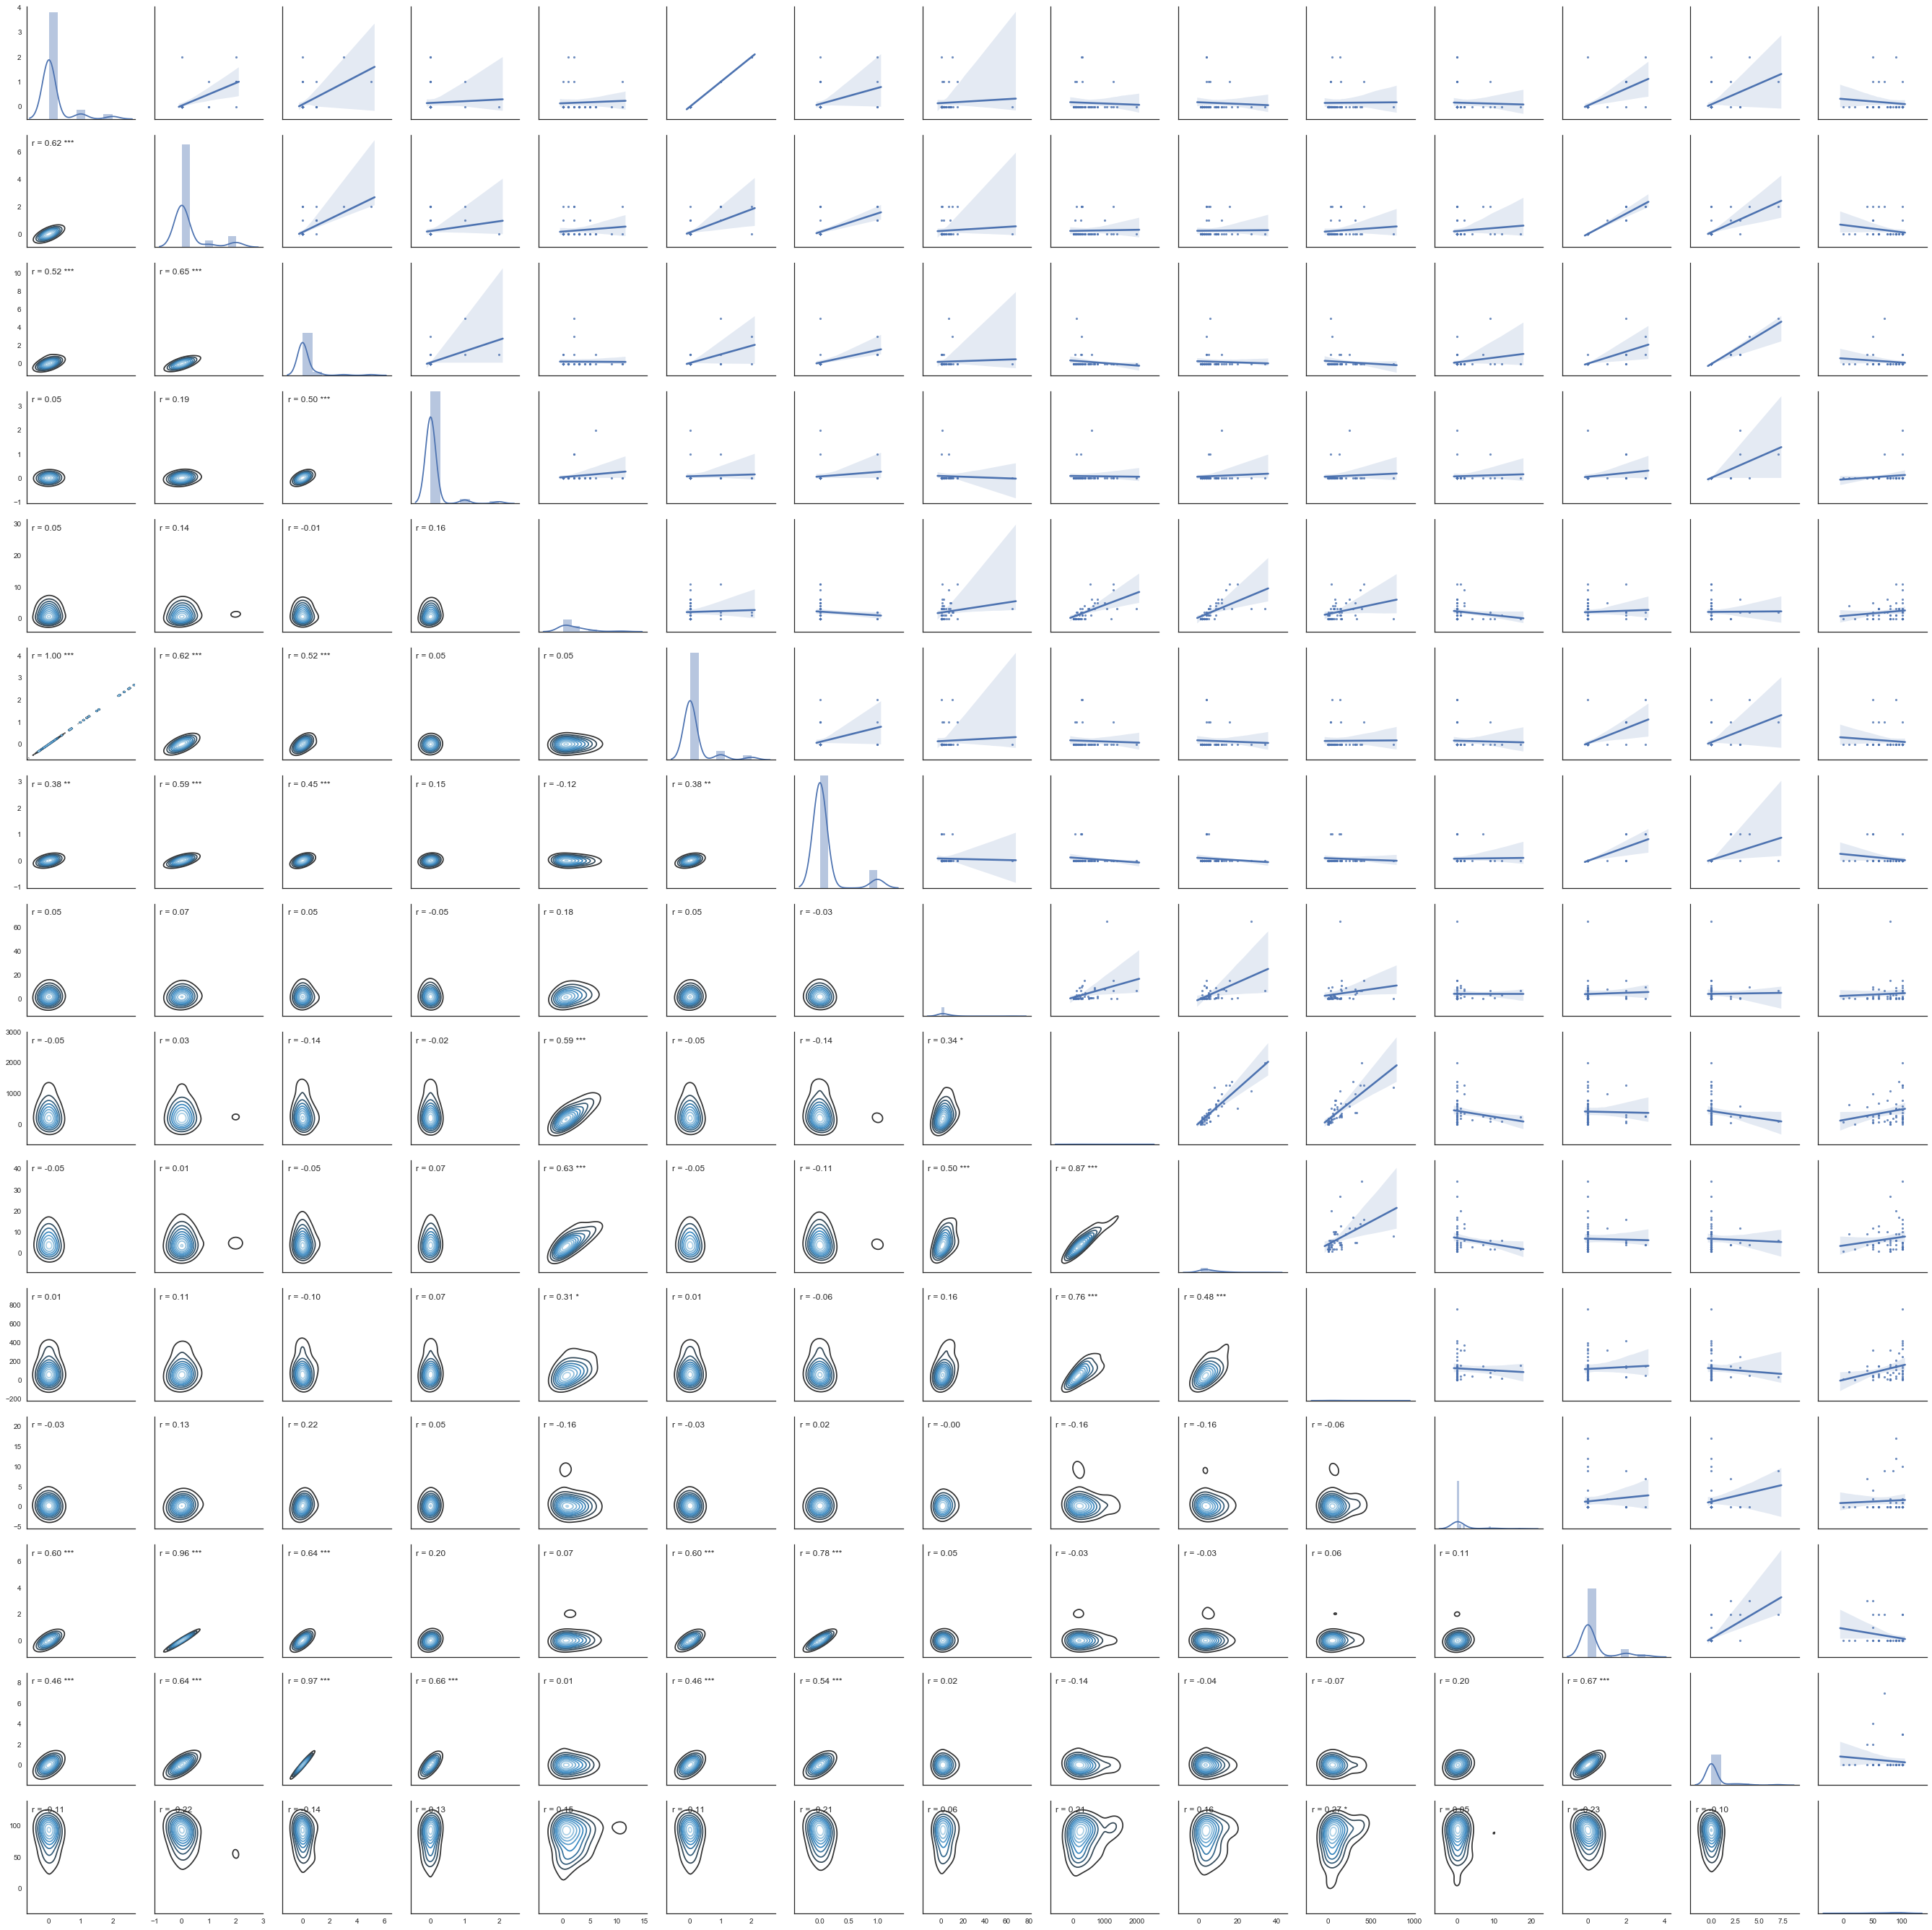

In [10]:
kyoto_1_x = pd.read_csv('dataset/dataset1_15features.csv')
kyoto_1_x.rename(index=str, columns={"Userid": "userid"}, inplace=True)
# kyoto_1_x = pd.merge(kyoto_1_x, kyoto_1_score, on='userid')
kyoto_1_x = kyoto_1_x.drop(['userid','Delete_Memo'], axis=1)

cor_matrix(kyoto_1_x[list(kyoto_1_x)[0:]])

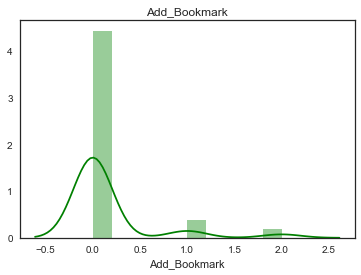

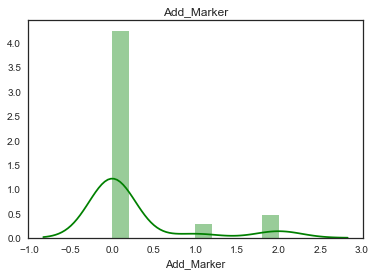

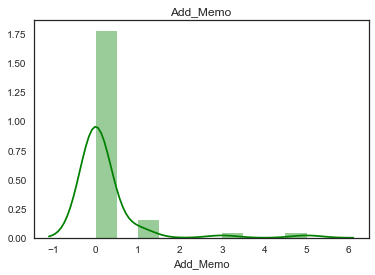

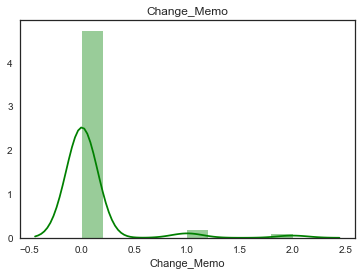

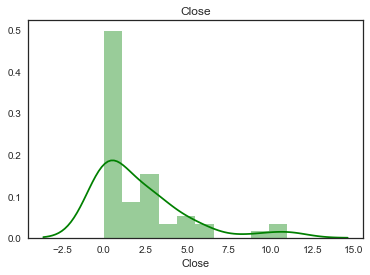

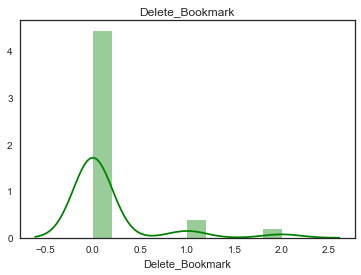

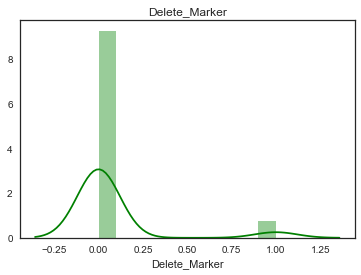

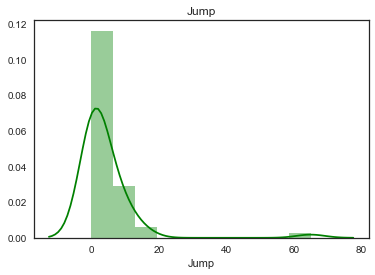

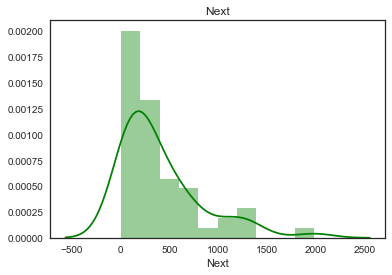

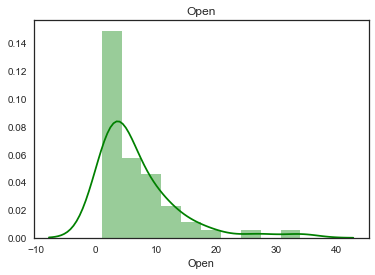

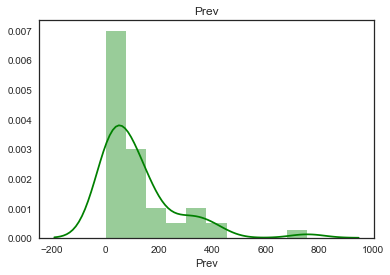

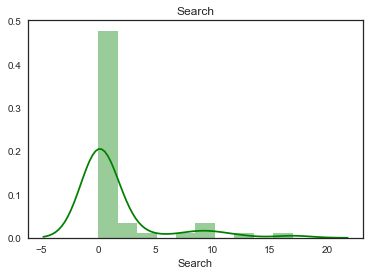

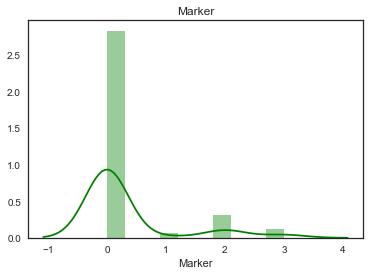

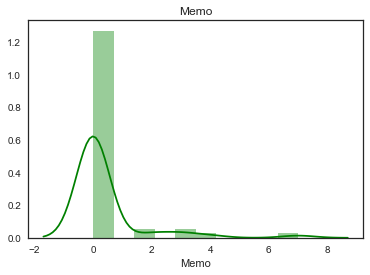

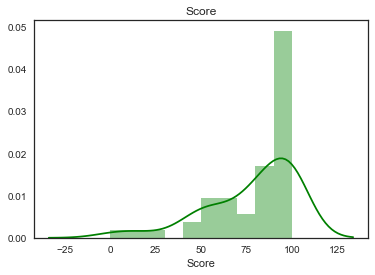

In [11]:

for name in list(kyoto_1_x):
    
    fig, ax = plt.subplots()
    sns.distplot(kyoto_1_x[name], bins=10, color="g", ax=ax)
    ax.set_title(name)
    plt.show()